# Assignment 3 
Statistics for understanding the market



In this assignment, your goal is to find the stocks that is well suited for your investment. The list below is the step-by-step to choose the stock.

1. Use Python to downloads the historical prices from January 1, 2020 to December 21, 2020 from Yahoo Finance. Here, we are interested in the top 48 stocks in the market. All symbols of all 48 stocks are given in the "set48.txt" attached with the assignment in Google Classroom.


In [1]:
import csv 
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
set48 = ['ADVANC', 'AOT', 'BBL','BDMS','BEM', 'BGRIM','BH','BJC','BPP','BTS','CBG','CPALL','CPF','CPN','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TTW','TU','VGI','WHA']

stocks = pd.Series(set48)+'.bk'
df = data.DataReader(stocks, "yahoo", '2020-01-01', '2020-12-31')

print(df)

Attributes   Adj Close                                               \
Symbols      ADVANC.bk     AOT.bk      BBL.bk    BDMS.bk     BEM.bk   
Date                                                                  
2020-01-02  206.269302  74.814011  156.630249  25.892046  10.688825   
2020-01-03  204.376923  73.571259  153.756302  24.905682  10.786888   
2020-01-06  205.323105  71.831398  149.445374  24.905682  10.688825   
2020-01-07  211.000244  73.322701  149.924377  25.152273  11.081076   
2020-01-08  208.161682  72.577049  146.571426  24.905682  10.983013   
...                ...        ...         ...        ...        ...   
2020-12-24  174.713943  61.750000  122.000000  20.700001   8.500000   
2020-12-25  175.203339  62.500000  121.500000  20.700001   8.500000   
2020-12-28  173.245758  61.500000  118.000000  20.299999   8.450000   
2020-12-29  174.713943  62.500000  121.000000  21.100000   8.600000   
2020-12-30  172.266968  62.250000  118.500000  20.799999   8.300000   

Attri

2. Next, you want to find the top **five** stocks with the highest average return. Please add the average annualized return (RET) of the top five stock by computing the average daily return and multiply with 250 (Here, we assume that there are 250 trading days in a year.). You must put your results by filling the blank below:
The stocks are


1. KTC with 57.373% of return
2. CBG with 47.720% of return
3. EA with 22.891% of return
4. IVL with 22.591% of return
5. GLOBAL with 19.677% of return


In [3]:
top_list = ['ADVANC', 'AOT', 'BBL','BDMS','BEM', 'BGRIM','BH','BJC','BPP','BTS','CBG','CPALL','CPF','CPN','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TTW','TU','VGI','WHA']
top48 = dict()
stock_list = []
for stock in top_list:
    try:
        df = data.DataReader(f"{stock}.BK", "yahoo", "2020-01-01","2020-12-31") 
        price = df.Close
        ret = price.pct_change(1)
        ret = ret.dropna()
        day_in_year = 250
        returned = day_in_year*ret.mean()*100
        stock_list.append(returned)
    except:
        print("Date is out of range")

stock_returned = pd.DataFrame({'stock':top_list, 'returned':stock_list})

top5_rt = stock_returned.nlargest(n = 5 ,columns = 'returned')
top5_rt
for idx, row in top5_rt.iterrows():
  print(f"{row[0]} with {row[1]:0.3f}% of return")

KTC with 57.373% of return
CBG with 47.720% of return
GLOBAL with 24.372% of return
EA with 22.891% of return
IVL with 22.591% of return


3. You also concern about the risk. As a result, you want stock with the lowest volatility. Here. the volatilities are measured by the standard deviations (STDs), Report stocks with the five lowest volatilities and compute their corresponding annualized STD by multiply the daily STD with the square root of 250.(√250  )  
The stocks are 


1. CPALL with 0.236% of volatility
2. TTW with 0.242% of volatility
3. ADVANC with 0.251% of volatility
4. SCC with 0.276% of volatility
5. TISCO with 0.298% of volatility

In [4]:
top_list = ['ADVANC', 'AOT', 'BBL','BDMS','BEM', 'BGRIM','BH','BJC','BPP','BTS','CBG','CPALL','CPF','CPN','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TTW','TU','VGI','WHA']
top48 = dict()
stock_list = []
for stock in top_list:
    try:
        df = data.DataReader(f"{stock}.BK", "yahoo", "2020-01-01","2020-12-31") 
        high = df.High
        low = df.Low
        day_in_year = 250
        vol_range = (np.log(high/low)**2).mean()
        vol_range = vol_range/(4*np.log(2))
        vol_range = np.sqrt(vol_range)
        vol_range = np.sqrt(day_in_year) * vol_range
        stock_list.append(vol_range)
    except:
        print("Date is out of range")

stock_returned = pd.DataFrame({'stock':top_list, 'returned':stock_list})

top5_rt = stock_returned.nsmallest(n = 5 ,columns = 'returned')
top5_rt
for idx, row in top5_rt.iterrows():
  print(f"{row[0]} with {row[1]:0.3f}% of volatility")

CPALL with 0.236% of volatility
TTW with 0.242% of volatility
ADVANC with 0.251% of volatility
SCC with 0.276% of volatility
TISCO with 0.298% of volatility


4. Furthermore, the volatility and return should be compared. A stock with the same level of return the one with lower volatility is more preferable. Thus, in this part, you will compute the coefficient of variation (CV) defined as (STD/RET). Here, a stock with lower CV is less volatile. However, we should look only the stock with positive return. Hence, find the top 5 stocks with the **lowest CV** and the **positive return**:

The stocks are

1. KTC with CV of 1.03
2. CBG with CV of 1.14
3. GLOBAL with CV of 1.75
4. IVL with CV of 2.69
5. SAWAD with CV of 3.03



In [5]:
top_list = ['ADVANC','AOT','BBL','BDMS','BEM','BGRIM','BH','BJC','BPP','BTS','CBG','CPALL','CPF','CPN','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TTW','TU','VGI','WHA']
cv = {}
low_cv = []
for stock in top_list:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    daily_ret = df['Adj Close'].pct_change(1).dropna()
    avg_ret = daily_ret.mean()
    RET = avg_ret*250*100
    std_ret = daily_ret.std()
    vola = std_ret*np.sqrt(250)*100
    coef = vola/RET
    if coef>=0:
        cv[stock] = coef
        
coef_var = sorted(cv.items(), key=lambda x: x[1])
for i in coef_var[0:5]:
    print(f'{i[0]} with CV of {i[1]:.2f}')
    low_cv.append(i)

KTC with CV of 1.03
CBG with CV of 1.14
GLOBAL with CV of 1.75
IVL with CV of 2.69
SAWAD with CV of 3.03


5. From the stock in Part 4. Use the stock with lowest CV and plot histogram of the annualized return.


(array([ 1.,  0.,  1.,  0.,  0.,  2.,  0.,  3.,  5., 12., 18., 48., 67.,
        43., 19.,  8.,  4.,  2.,  1.,  2.]),
 array([-45.62044244, -41.86214767, -38.10385291, -34.34555814,
        -30.58726337, -26.8289686 , -23.07067383, -19.31237906,
        -15.55408429, -11.79578953,  -8.03749476,  -4.27919999,
         -0.52090522,   3.23738955,   6.99568432,  10.75397908,
         14.51227385,  18.27056862,  22.02886339,  25.78715816,
         29.54545293]),
 <BarContainer object of 20 artists>)

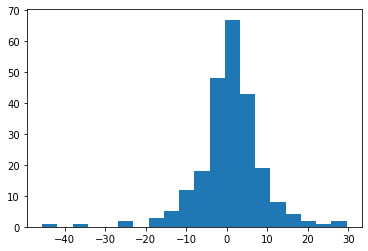

In [6]:
df = data.DataReader("KTC.BK", "yahoo", "2020-01-01", "2020-12-21") 
daily_ret = df['Adj Close'].pct_change(1).dropna()*250
plt.hist(daily_ret, bins=20)

6. The investment is risky. To control the risk, a good investor will diversify their portfolio with securities that have negative correlations. 

Find the two stocks with lowest (more negative) correlations 


Stock 1 MINT

Stock 2 TU with correlation of 0.09543960989975975.

In [7]:
top_list = ['ADVANC', 'AOT', 'BBL','BDMS','BEM', 'BGRIM','BH','BJC','BPP','BTS','CBG','CPALL','CPF','CPN','DTAC','EA','EGCO','GLOBAL','GPSC','GULF','HMPRO','INTUCH','IRPC','IVL','KBANK','KTB','KTC','LH','MINT','MTC','OSP','PTT','PTTEP','PTTGC','RATCH','SAWAD','SCB','SCC','TCAP','TISCO','TMB','TOA','TOP','TRUE','TTW','TU','VGI','WHA']

top48 = dict()
for stock in top_list:
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    daily_ret = df['Adj Close'].pct_change(1).dropna()
    top48[stock] = daily_ret
        
top48 = pd.DataFrame(top48) 
Stock_low = []
for i in top_list:
    if top48.corr()[i].values.min() == top48.corr().values.min():
        Stock_low.append(i)
        
print(f"{Stock_low}")
print(top48.corr().values.min())

['MINT', 'TU']
0.09543960989975975


7.From two stocks in Part 6. If an intestor invest 1 million THB on Stock 1 alone on January 1, 2020. How much money an investor has at the end of December 21, 2020? 

Answer Total Wealth on the last day by investing 1,000,000 on MINT: 723,690.10

In [8]:
wealth = 1000000
df = data.DataReader("MINT.BK", "yahoo", "2020-01-01", "2020-12-21") 
price_first = wealth / df['Adj Close'].values[0]
price_last = price_first * df['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on MINT: {price_last:,.2f}")

Total Wealth on the last day by investing 1,000,000 on MINT: 723,690.10


8.From two stocks in Part 6. If an intestor invest 1 million THB on Stock 2 alone on January 1, 2020. How much money an investor has at the end of December 21, 2020? 

Answer Total Wealth on the last day by investing 1,000,000 on TU: 1,037,647.69

In [9]:
wealth = 1000000
df = data.DataReader("TU.BK", "yahoo", "2020-01-01", "2020-12-21") 
stock_at_day_1 = wealth / df['Adj Close'].values[0]
price_last = stock_at_day_1 * df['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on TU: {price_last:,.2f}")

Total Wealth on the last day by investing 1,000,000 on TU: 1,037,647.69


9.From two stocks in Part 6. If an intestor invest 0.5 million THB on Stock 1 and 0.5 million THB on Stock 2 on January 1, 2020. 

How much money an investor has at the end of December 21, 2020? 

Answer 

Total Wealth on the last day by investing 500,000 on MINT: 361,980.76


Total Wealth on the last day by investing 500,000 on TU: 518,823.85

In [10]:
MT = ['MINT', 'TU']
for stock in MT:
    wealth = 500000
    df = data.DataReader(stock+".BK", "yahoo", "2020-01-01", "2020-12-21") 
    stock_at_day_1 = wealth / df['Adj Close'].values[0]
    wealth_last_day = stock_at_day_1 * df['Adj Close'].values[-1]
    print(f"Total Wealth on the last day by investing {wealth:,} on {stock}: {wealth_last_day:,.2f}")

Total Wealth on the last day by investing 500,000 on MINT: 361,845.05
Total Wealth on the last day by investing 500,000 on TU: 518,823.85
